In [1]:
import cv2
import numpy as np
import os
from tensorflow import keras
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import csv
import pandas as pd

ModuleNotFoundError: No module named 'wrapt'

# 단어 종류 종합

In [ ]:
#현재 폴더
path_dir = './'
file_list = os.listdir(path_dir)

In [ ]:
file_list 

In [ ]:
pd.read_excel('중복단어 수정.xlsx')

In [ ]:
df = pd.read_excel('중복단어 수정.xlsx')

In [ ]:
name = df.drop_duplicates(['단어이름'])

In [2]:
action = open('actions.txt','r',encoding ="utf-8")
x = action.read()
x = x.split("\n")
x

['자극',
 '당뇨병',
 '면역',
 '감기',
 '변비',
 '붕대',
 '설사',
 '성병',
 '소화제',
 '수면제',
 '회복',
 '입원',
 '진단서',
 '치료',
 '퇴원',
 '빈혈',
 '화상',
 '술',
 '커피',
 '의사',
 '간호사',
 '금식',
 '금연',
 '금주',
 '식도염',
 '숨차다',
 '통증',
 '가렵다',
 '답답',
 '건강',
 '불안',
 '검사',
 '팔',
 '아프다',
 '춥다',
 '머리',
 '충혈',
 '왼쪽',
 '오른쪽',
 '떨다',
 '몸',
 '전염',
 '병원',
 '병',
 '상처',
 '병원',
 '붓다',
 '피곤',
 '중독',
 '치매',
 '환자',
 '충격',
 '노화',
 '가루약',
 '물약',
 '약효',
 '무기력',
 '체온']

In [3]:
#중복 제거한 단어들 모음
actions = np.array(x,dtype='object')

In [4]:
actions

array(['자극', '당뇨병', '면역', '감기', '변비', '붕대', '설사', '성병', '소화제', '수면제',
       '회복', '입원', '진단서', '치료', '퇴원', '빈혈', '화상', '술', '커피', '의사', '간호사',
       '금식', '금연', '금주', '식도염', '숨차다', '통증', '가렵다', '답답', '건강', '불안',
       '검사', '팔', '아프다', '춥다', '머리', '충혈', '왼쪽', '오른쪽', '떨다', '몸', '전염',
       '병원', '병', '상처', '병원', '붓다', '피곤', '중독', '치매', '환자', '충격', '노화',
       '가루약', '물약', '약효', '무기력', '체온'], dtype=object)

In [5]:
f_name = np.array(df['파일 이름'])

NameError: name 'df' is not defined

In [6]:
f_name.shape

NameError: name 'f_name' is not defined

# Keypoints using MP Holistic

In [7]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

NameError: name 'mp' is not defined

In [8]:
## mediapipe로 관절 포인트 표시
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image, results

In [9]:
#랜드마크 그려주기
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #POSE 랜드마크
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #왼손 랜드마크
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #오른손 랜드마크

In [10]:
##keypoint 좌표 반화
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose, lh, rh])

def extract_keypoints_pose(result):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    return np.concatenate([pose])

def extract_keypoints_hand(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([lh, rh])   

# 전처리 데이터 폴더 생성

In [27]:
DATA_PATH = os.path.join('MP_Data2')

In [28]:
for action in actions:
    os.makedirs(os.path.join(DATA_PATH, action))

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'MP_Data2\\고민'

In [11]:
sequence_lenght = 30

# CNN 전처리 폴더

In [17]:
DATA_PATH = os.path.join('image')

In [10]:
os.makedirs(os.path.join(DATA_PATH))

In [11]:
f_name = np.array(df['파일 이름'])

NameError: name 'df' is not defined

In [ ]:
data

# CNN 데이터 수집

In [18]:
data = pd.read_excel('중복단어 수정.xlsx')

In [19]:
f_name = np.array(data['파일 이름'])

In [20]:
len(f_name)

6340

In [21]:
data = data.set_index('파일 이름')

In [22]:
forder_list

NameError: name 'forder_list' is not defined

In [27]:
sequence_lenght = 1
f = open("오류.txt", 'w') #오류 저장할 파일
sequence_num = 0
path_dir = 'E:/capstone/수어 영상/1.Training/video/수어 영상/1.Training' ##비디오 파일 위치폴더 <<-- 이부분만 수정하시면 됩니다
data_list = '사진/'##현재까지 생성된 mp데이터
forder_list = os.listdir(path_dir)
data_frame = 0
cap = cv2.VideoCapture(0)
#Set mediapipe model
for forder in forder_list:
    forder_name = path_dir + '/' + forder  ##폴더 주소
    file_list = os.listdir(forder_name)
    all_data = 0
    for file in file_list:
        if all_data == 50:
            break
        if file in f_name:
            print(file)
            get_num = 0
            video_name = forder_name + "/" + file ##비디오 주소
            video_frame = 0
            frame_num = 0
            name = str(data.loc[file][0])#비디오 이름
            start_frame = int(data.loc[file][1] * 30) ##수어 시작 프레임
            video_length = int(data.loc[file][2] * 30) ##수어 길이
            
            cap = cv2.VideoCapture(video_name)
            try:
                with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
                    while cap.isOpened():

                        # feed 읽기
                        ret, frame = cap.read()
                        #detections 만들기
                        image, results = mediapipe_detection(frame, holistic)
                        
                        cv2.imwrite("image/"+str(data_frame) + ".png", image)
                        frame_num += 1
                        data_frame += 1
                        all_data += 1
                        print(frame_num)
                        #화면에 보여주기
                        cv2.imshow("OpenCV Feed",image)
                        if not ret or frame_num == sequence_lenght: ##no_sequence까지 프레임 저장
                                print("프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...")
                                break
                        #화면 종료
                        if cv2.waitKey(10) & 0xFF == ord('q'):
                            break
                    cap.release()
                    cv2.destroyAllWindows()
            except Exception as e:
                f.write(str(file) + " " + str(e) +"\n")     
                print(e)
                pass
f.close()

NIA_SL_WORD1519_REAL01_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1519_REAL01_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1519_REAL01_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1519_REAL01_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1519_REAL01_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1533_REAL01_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1533_REAL01_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1533_REAL01_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1533_REAL01_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1533_REAL01_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1534_REAL01_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1534_REAL01_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1534_REAL01_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1534_REAL01_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1534_REAL01_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1536_REAL01_D.

1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1555_REAL02_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1555_REAL02_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1555_REAL02_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1569_REAL02_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1569_REAL02_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1569_REAL02_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1569_REAL02_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1569_REAL02_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1571_REAL02_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1571_REAL02_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1571_REAL02_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1571_REAL02_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1571_REAL02_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1576_REAL02_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD1576_REAL02_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?)

1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0001_REAL03_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0008_REAL03_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0008_REAL03_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0008_REAL03_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0008_REAL03_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0008_REAL03_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0010_REAL03_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0010_REAL03_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0010_REAL03_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0010_REAL03_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0010_REAL03_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0020_REAL03_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0020_REAL03_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0020_REAL03_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0020_REAL03_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?)

1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0029_REAL04_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0029_REAL04_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0029_REAL04_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0029_REAL04_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0033_REAL04_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0033_REAL04_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0033_REAL04_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0033_REAL04_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0033_REAL04_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0036_REAL04_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0036_REAL04_F.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0036_REAL04_L.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0036_REAL04_R.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0036_REAL04_U.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...
NIA_SL_WORD0037_REAL04_D.mp4
1
프레임을 수신할 수 없습니다(스트림 끝?)

# 데이터 수집

In [20]:
data = pd.read_excel('test1.xlsx').set_index('파일 이름')

In [21]:
data

,단어이름,수어 시작,수어 길이
파일 이름,,,
NIA_SL_WORD0001_REAL01_D.mp4,고민,1.743,1.360
NIA_SL_WORD0001_REAL01_F.mp4,고민,1.743,1.360
NIA_SL_WORD0001_REAL01_L.mp4,고민,1.743,1.360
NIA_SL_WORD0001_REAL01_R.mp4,고민,1.743,1.360
NIA_SL_WORD0001_REAL01_U.mp4,고민,1.743,1.360
NIA_SL_WORD0001_REAL02_D.mp4,고민,3.066,1.338
NIA_SL_WORD0001_REAL02_F.mp4,고민,3.066,1.338
NIA_SL_WORD0001_REAL02_L.mp4,고민,3.066,1.338
NIA_SL_WORD0001_REAL02_R.mp4,고민,3.066,1.338


In [21]:
f = open("오류.txt", 'w') #오류 저장할 파일
sequence_num = 0
path_dir = 'E:/캡스톤 영상/수어 영상/1.Training/video/수어 영상/새 폴더' ##비디오 파일 위치폴더 <<-- 이부분만 수정하시면 됩니다
data_frame = 0
data_list = 'MP_Data2/'##현재까지 생성된 mp데이터
forder_list = os.listdir(path_dir)

cap = cv2.VideoCapture(0)
#Set mediapipe model
for forder in forder_list:
    forder_name = path_dir + '/' + forder  ##폴더 주소
    file_list = os.listdir(forder_name)
    for file in file_list:
        if file in f_name:
            get_num = 0
            video_name = forder_name + "/" + file ##비디오 주소
            video_frame = 0
            frame_num = 0
            name = str(data.loc[file][0])#비디오 이름
            make_num = len(os.listdir(data_list + name)) ##만들어야 하는 폴더 이름
            start_frame = int(data.loc[file][1] * 30) ##수어 시작 프레임
            video_length = int(data.loc[file][2] * 30) ##수어 길이
            os.makedirs(os.path.join(DATA_PATH, name,str(make_num)))#해당 영상 폴더 번호
            print(file)
            cap = cv2.VideoCapture(video_name)
            try:
                with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
                    while cap.isOpened():

                        # feed 읽기
                        ret, frame = cap.read()
                        if not ret or frame_num == sequence_lenght: ##no_sequence까지 프레임 저장
                                print("프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...")
                                break
                        #detections 만들기
                        image, results = mediapipe_detection(frame, holistic)
                        
                        if frame_num < 30:
                                keypoints = extract_keypoints(results)
                                npy_path = os.path.join(DATA_PATH, name,str(make_num),str(frame_num))
                                np.save(npy_path, keypoints)
                                frame_num += 1

                        #랜드마크 그리기
                        draw_landmarks(image,results)
                        
                        #화면에 보여주기
                        cv2.imshow("OpenCV Feed",image)

                        #화면 종료
                        if cv2.waitKey(10) & 0xFF == ord('q'):
                            break
                    cap.release()
                    cv2.destroyAllWindows()
            except Exception as e:
                f.write(str(file) + " " + str(e) +"\n")     
                print(e)
                pass
f.close()

KeyError: 'NIA_SL_WORD1519_REAL05_D.mp4'

## path_dir의 주소를 비디오 파일 폴더 위치에 옮기시면 됩니다 

In [17]:
f = open("오류.txt", 'w') #오류 저장할 파일
sequence_num = 0
path_dir = 'E:/캡스톤 영상/수어 영상/1.Training/video/수어 영상/1.Training' ##비디오 파일 위치폴더 <<-- 이부분만 수정하시면 됩니다
data_frame = 0
data_list = 'MP_Data/'##현재까지 생성된 mp데이터
forder_list = os.listdir(path_dir)
get_frame=[[2,2,2,3],[2,2,3],[2,3],[3,3,2],[3,3,3,3,2],[3],[2]]

for forder in forder_list:
    forder_name = path_dir + '/' + forder  ##폴더 주소
    file_list = os.listdir(forder_name)
    for file in file_list:
        if file in f_name:
            get_num = 0
            video_name = forder_name + "/" + file ##비디오 주소
            video_frame = 0
            frame_num = 0
            name = str(data.loc[file][0])#비디오 이름
            make_num = len(os.listdir(data_list + name)) ##만들어야 하는 폴더 이름
            start_frame = int(data.loc[file][1] * 30) ##수어 시작 프레임
            video_length = int(data.loc[file][2] * 30) ##수어 길이
            os.makedirs(os.path.join(DATA_PATH, name,str(make_num)))#해당 영상 폴더 번호
            print(file)
            cap = cv2.VideoCapture(video_name)
            try:
                if video_length >= 30 and video_length <60:
                    if video_length == 30:
                        delect_frame = 30
                    else:
                        delect_frame  = int(sequence_lenght/(video_length - sequence_lenght))+1
                    
                    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
                        while cap.isOpened():

                            # feed 읽기
                            ret, frame = cap.read()
                            if not ret or video_frame == sequence_lenght: ##no_sequence까지 프레임 저장
                                print("프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...")
                                break
                            #detections 만들기
                            image, results = mediapipe_detection(frame, holistic)

                            if frame_num >= start_frame and (frame_num-start_frame)%delect_frame != 0: 
                                keypoints = extract_keypoints(results)
                                npy_path = os.path.join(DATA_PATH, name,str(make_num),str(video_frame))
                                np.save(npy_path, keypoints)
                                video_frame += 1

                            #화면에 보여주기
                            cv2.imshow("OpenCV Feed",image)
                            frame_num += 1
                            #화면 종료
                            if cv2.waitKey(10) & 0xFF == ord('q'):
                                break
                        cap.release()
                        cv2.destroyAllWindows()
                elif video_length > 60:
                        ##비디오 길이에 마다 뽑아낼 길이 나누는 if문
                        if video_length <65:
                            get = 6
                        elif video_length <= 65:
                            get = 0
                        elif video_length > 65 and video_length <= 70:
                            get = 1
                        elif video_length > 70 and video_length <= 75:
                            get = 2
                        elif video_length > 75 and video_length <= 80:
                            get = 3
                        elif video_length > 80 and video_length <= 85:
                            get = 4
                        else:
                            get = 5
                        get_F = get_frame[get][get_num]
                        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
                            while cap.isOpened():

                                # feed 읽기
                                ret, frame = cap.read()
                                if not ret or video_frame == sequence_lenght: ##no_sequence까지 프레임 저장
                                    print("프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...")
                                    break
                                #detections 만들기
                                image, results = mediapipe_detection(frame, holistic)
                                if frame_num >= start_frame and (frame_num-start_frame)%get_F  == 0: 
                                    keypoints = extract_keypoints(results)
                                    npy_path = os.path.join(DATA_PATH, name,str(make_num),str(video_frame))
                                    np.save(npy_path, keypoints)
                                    video_frame += 1
                                    if (frame_num-start_frame)!= 0:
                                        get_num += 1
                                        get_F += get_frame[get][get_num % len(get_frame[get])]

                                #화면에 보여주기
                                cv2.imshow("OpenCV Feed",image)
                                frame_num += 1
                                #화면 종료
                                if cv2.waitKey(10) & 0xFF == ord('q'):
                                    break
                            cap.release()
                            cv2.destroyAllWindows()
                else:
                        plus_frame  = int(sequence_lenght/(sequence_lenght - video_length))-1
                        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
                            while cap.isOpened():

                                # feed 읽기
                                ret, frame = cap.read()
                                if not ret or video_frame == sequence_lenght: ##no_sequence까지 프레임 저장
                                    print("프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...")
                                    break
                                #detections 만들기
                                image, results = mediapipe_detection(frame, holistic)

                                if frame_num >= start_frame and (frame_num-start_frame)%plus_frame==0: 
                                    keypoints = extract_keypoints(results)
                                    npy_path = os.path.join(DATA_PATH, name,str(make_num),str(video_frame))
                                    np.save(npy_path, keypoints)
                                    video_frame += 1
                                    npy_path = os.path.join(DATA_PATH, name,str(make_num),str(video_frame))
                                    np.save(npy_path, keypoints)
                                    video_frame += 1
                                elif frame_num >= start_frame and (frame_num-start_frame)%plus_frame!=0:
                                    keypoints = extract_keypoints(results)
                                    npy_path = os.path.join(DATA_PATH, name,str(make_num),str(video_frame))
                                    np.save(npy_path, keypoints)
                                    video_frame += 1
                                #화면에 보여주기
                                cv2.imshow("OpenCV Feed",image)
                                frame_num += 1
                                #화면 종료
                                if cv2.waitKey(10) & 0xFF == ord('q'):
                                    break
                            cap.release()
                            cv2.destroyAllWindows()
            except Exception as e:
                f.write(str(file) + " " + str(e) +"\n")     
                print(e)
                pass
f.close()                

NameError: name 'DATA_PATH' is not defined

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [15]:
label_map = {label:num for num, label in enumerate(actions)}

In [16]:
label_map

{'자극': 0,
 '당뇨병': 1,
 '면역': 2,
 '감기': 3,
 '변비': 4,
 '붕대': 5,
 '설사': 6,
 '성병': 7,
 '소화제': 8,
 '수면제': 9,
 '회복': 10,
 '입원': 11,
 '진단서': 12,
 '치료': 13,
 '퇴원': 14,
 '빈혈': 15,
 '화상': 16,
 '술': 17,
 '커피': 18,
 '의사': 19,
 '간호사': 20,
 '금식': 21,
 '금연': 22,
 '금주': 23,
 '식도염': 24,
 '숨차다': 25,
 '통증': 26,
 '가렵다': 27,
 '답답': 28,
 '건강': 29,
 '불안': 30,
 '검사': 31,
 '팔': 32,
 '아프다': 33,
 '춥다': 34,
 '머리': 35,
 '충혈': 36,
 '왼쪽': 37,
 '오른쪽': 38,
 '떨다': 39,
 '몸': 40,
 '전염': 41,
 '병원': 45,
 '병': 43,
 '상처': 44,
 '붓다': 46,
 '피곤': 47,
 '중독': 48,
 '치매': 49,
 '환자': 50,
 '충격': 51,
 '노화': 52,
 '가루약': 53,
 '물약': 54,
 '약효': 55,
 '무기력': 56,
 '체온': 57}

# 얼굴을 포함 한 데이터

In [12]:
sequence_lenght = 30

In [17]:
sequences , labels = [],[]
path_dir = 'MP_Data_all'
forder_list = os.listdir(path_dir)
for forder in forder_list:
    dir = path_dir +'/' +forder
    DATA_PATH = os.path.join(dir)
    for action in actions:
            file_dir = dir + '/' + action
            file_list = os.listdir(file_dir)
            for sequence in range(len(file_list)):
                window = []
                if len(os.listdir(file_dir+"/"+str(sequence)))!=0:
                    for frame_num in range(sequence_lenght):
                        res = np.load(os.path.join(DATA_PATH, action , str(sequence), "{}.npy.".format(frame_num)))
                        window.append(res)
                    sequences.append(window)
                    labels.append(label_map[action])
                else:
                    print(file_dir+"/"+str(sequence))

KeyboardInterrupt: 

# 얼굴 제거

np.array(sequences).shape

In [118]:
sequences , labels = [],[]
path_dir = 'MP_Data_all'
forder_list = os.listdir(path_dir)
for forder in forder_list:
    dir = path_dir +'/' +forder
    DATA_PATH = os.path.join(dir)
    for action in actions:
            file_dir = dir + '/' + action
            file_list = os.listdir(file_dir)
            for sequence in range(len(file_list)):
                window = []
                if len(os.listdir(file_dir+"/"+str(sequence)))!=0:
                    for frame_num in range(sequence_lenght):
                        res = np.load(os.path.join(DATA_PATH, action , str(sequence), "{}.npy.".format(frame_num)))
                        window.append(res[40,258])
                    sequences.append(window)
                    labels.append(label_map[action])
                else:
                    print(file_dir+"/"+str(sequence))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

# 얼굴,다리 제거

In [27]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [18]:
from tqdm import tqdm

In [19]:
sequences , labels = [],[]
path_dir = 'MP_Data_all'
forder_list = os.listdir(path_dir)
for forder in forder_list:
    dir = path_dir +'/' +forder
    DATA_PATH = os.path.join(dir)
    for action in tqdm(actions):
            file_dir = dir + '/' + action
            file_list = os.listdir(file_dir)
            for sequence in range(len(file_list)):
                window = []
                if len(os.listdir(file_dir+"/"+str(sequence)))!=0:
                    for frame_num in range(sequence_lenght):
                        res = np.load(os.path.join(DATA_PATH, action , str(sequence), "{}.npy.".format(frame_num)))
                        window.append(np.concatenate([res[0:99], res[132:258]]))
                    sequences.append(window)
                    labels.append(label_map[action])
                else:
                    print(file_dir+"/"+str(sequence))

 79%|█████████████████████████████████████████████████████████████████                 | 46/58 [01:25<00:22,  1.90s/it]

MP_Data_all/MP_Data2/붓다/6


100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [01:57<00:00,  2.02s/it]


In [22]:
forder = 'MP_Data'

In [23]:
path_dir = 'MP_Data_all'
forder_list = os.listdir(path_dir)
for forder in forder_list:
    dir = path_dir +'/' +forder
    print(dir)

MP_Data_all/MP_Data
MP_Data_all/MP_Data1
MP_Data_all/MP_Data2


In [24]:
np.array(labels).shape

(2748,)

In [25]:
np.array(sequences).shape

(2748, 30, 225)

In [26]:
np.array(sequences)

array([[[ 4.64958996e-01,  2.26776570e-01, -2.92259634e-01, ...,
          3.95901859e-01,  2.41528273e-01, -8.05357471e-03],
        [ 4.65668291e-01,  2.27383271e-01, -3.15993726e-01, ...,
          4.02935535e-01,  2.53803492e-01, -6.59789750e-03],
        [ 4.67370689e-01,  2.27526352e-01, -3.28716815e-01, ...,
          4.04397607e-01,  2.54917920e-01, -7.11078616e-03],
        ...,
        [ 4.71452653e-01,  2.36464351e-01, -2.47816175e-01, ...,
          3.29006404e-01,  7.36425459e-01, -2.72185914e-02],
        [ 4.69905406e-01,  2.35462323e-01, -2.96609908e-01, ...,
          3.25601190e-01,  8.61835539e-01, -2.48052292e-02],
        [ 4.69518483e-01,  2.31206208e-01, -3.31699431e-01, ...,
          3.23955059e-01,  9.48113501e-01, -1.71775371e-02]],

       [[ 5.00427127e-01,  1.95893124e-01, -4.18770581e-01, ...,
          4.34832364e-01,  2.16262445e-01, -6.51416555e-03],
        [ 5.00880897e-01,  1.98295012e-01, -4.10957694e-01, ...,
          4.38595414e-01,  2.24001154e

In [27]:
sequences

KeyboardInterrupt: 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.pyplot'

In [42]:
X = np.array(sequences)

In [43]:
X.shape

(2748, 30, 225)

In [44]:
y = to_categorical(labels).astype(int)

In [45]:
y.shape

(2748, 58)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [47]:
np.unique(y_test.astype('category').cat.codes, return_counts = True)


TypeError: data type 'category' not understood

In [48]:
y_test.cat.codes

AttributeError: 'numpy.ndarray' object has no attribute 'cat'

In [49]:
dataset1 = []
for i in range(len(y_test)):
    dataset1.append(actions[np.argmax(y_test[i])])
    
np.unique(dataset1, return_counts = True)

(array(['가렵다', '가루약', '간호사', '감기', '검사', '금식', '금연', '금주', '노화', '답답',
        '당뇨병', '떨다', '머리', '면역', '몸', '무기력', '물약', '변비', '병', '병원', '불안',
        '붓다', '붕대', '빈혈', '상처', '설사', '성병', '소화제', '수면제', '술', '숨차다',
        '식도염', '아프다', '약효', '오른쪽', '왼쪽', '의사', '입원', '자극', '전염', '중독',
        '진단서', '체온', '춥다', '충격', '충혈', '치료', '치매', '커피', '통증', '퇴원', '팔',
        '피곤', '화상', '환자', '회복'], dtype='<U3'),
 array([ 7, 11,  7,  3,  5, 11,  4,  7,  2,  5,  2,  2,  5,  4,  8,  1,  4,
         3,  5,  9,  2,  8,  4,  4,  4,  4,  2,  5,  4,  4, 10,  5,  2,  4,
         7,  3,  4,  5,  5,  4,  7,  4,  5,  4,  7,  2,  4,  8,  2,  5,  5,
         8,  5,  5,  7,  2], dtype=int64))

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional,Flatten
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import time
import datetime

%load_ext tensorboard

In [51]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [52]:
print(x_train.shape)
print(y_train.shape)

(2198, 30, 225)
(2198, 58)


In [53]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='4-28(58단어)/{epoch}-{val_loss:.2f}-{val_categorical_accuracy:.2f}.h5',             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=10,         # 10회 Epoch동안 개선되지 않는다면 종료
                             )

In [59]:

model = Sequential()
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(30,185)))
model.add(Bidirectional(LSTM(128,return_sequences=True, activation='relu')))
model.add(LSTM(64,return_sequences=False, activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

sgd = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=150,batch_size = 100, callbacks=[tb_callback,checkpoint],validation_data=(x_val, y_val))

# res = model.predict(x_test)
# loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

AttributeError: module 'pandas' has no attribute 'Series'

In [55]:
new_model = tf.keras.models.load_model('4-28(58단어)/94-0.21-0.95.h5')

In [57]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            74240     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30, 256)           197632    
_________________________________________________________________
flatten (Flatten)            (None, 7680)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 58)                445498    
Total params: 717,370
Trainable params: 717,370
Non-trainable params: 0
_________________________________________________________________


In [58]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

AttributeError: module 'pandas' has no attribute 'Series'

In [25]:
new_model = tf.keras.models.load_model('action(87퍼).h5')

In [26]:
model.save('action(87퍼).h5')

NameError: name 'model' is not defined

In [6]:
%tensorboard --logdir=./Logs 

Reusing TensorBoard on port 6006 (pid 9272), started 1:43:14 ago. (Use '!kill 9272' to kill it.)

In [26]:
test_list

NameError: name 'test_list' is not defined

In [54]:
res = new_model.predict(x_test)
loss_and_metrics = new_model.evaluate(x_test, y_test, batch_size=32)

9/9 [==============================] - 0s 9ms/step - loss: 0.4019 - categorical_accuracy: 0.9018


In [71]:
dataset2 = np.array([])
for i in range(len(res)):
    dataset2 = np.append(dataset2,actions[np.argmax(res[i])])
np.unique(dataset2, return_counts = True)

(array(['가렵다', '가루약', '간호사', '감기', '검사', '금식', '금연', '금주', '노화', '답답',
        '당뇨병', '떨다', '머리', '면역', '몸', '무기력', '물약', '변비', '병', '병원', '불안',
        '붓다', '붕대', '빈혈', '상처', '설사', '성병', '소화제', '수면제', '술', '숨차다',
        '식도염', '아프다', '약효', '오른쪽', '왼쪽', '의사', '입원', '자극', '전염', '중독',
        '진단서', '체온', '춥다', '충격', '충혈', '치료', '치매', '커피', '통증', '퇴원', '팔',
        '피곤', '화상', '환자', '회복'], dtype='<U32'),
 array([ 5, 11,  7,  2,  4,  8,  5,  7,  2,  4,  2,  2,  5,  4,  8,  1,  4,
         4,  5,  9,  5,  7,  4,  5,  4,  4,  2,  5,  3,  4, 11,  6,  2,  4,
         6,  7,  4,  5,  3,  5,  8,  4,  5,  4,  8,  3,  4,  9,  3,  6,  5,
         3,  5,  4,  7,  2], dtype=int64))

In [73]:
dataset1 = np.array([])
for i in range(len(y_test)):
    dataset1 = np.append(dataset1,actions[np.argmax(y_test[i])])
    
np.unique(dataset1, return_counts = True)

(array(['가렵다', '가루약', '간호사', '감기', '검사', '금식', '금연', '금주', '노화', '답답',
        '당뇨병', '떨다', '머리', '면역', '몸', '무기력', '물약', '변비', '병', '병원', '불안',
        '붓다', '붕대', '빈혈', '상처', '설사', '성병', '소화제', '수면제', '술', '숨차다',
        '식도염', '아프다', '약효', '오른쪽', '왼쪽', '의사', '입원', '자극', '전염', '중독',
        '진단서', '체온', '춥다', '충격', '충혈', '치료', '치매', '커피', '통증', '퇴원', '팔',
        '피곤', '화상', '환자', '회복'], dtype='<U32'),
 array([ 7, 11,  7,  3,  5, 11,  4,  7,  2,  5,  2,  2,  5,  4,  8,  1,  4,
         3,  5,  9,  2,  8,  4,  4,  4,  4,  2,  5,  4,  4, 10,  5,  2,  4,
         7,  3,  4,  5,  5,  4,  7,  4,  5,  4,  7,  2,  4,  8,  2,  5,  5,
         8,  5,  5,  7,  2], dtype=int64))

In [82]:
a = np.unique(dataset1[dataset1 == dataset2], return_counts = True)[1]
b = np.unique(dataset1, return_counts = True)[1]

In [102]:
print(np.unique(dataset1, return_counts = True)[0][1])
print((a/b)[0])

가루약
0.7142857142857143


In [104]:
data3 = {
    'word' : np.unique(dataset1, return_counts = True)[0],
    'pre' : a/b
}

dataset1 = pd.DataFrame(data3)

In [106]:
dataset1.to_csv("테스트셋_확률.csv")

### lr = 0.001일 때 성능이 가장 좋았음

In [65]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(30, 225)))
model.add(Bidirectional(LSTM(128,return_sequences=True, activation='relu')))
model.add(Flatten())
model.add(Dense(actions.shape[0],activation='softmax'))

sgd = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(x_train, y_train, epochs=200,batch_size = 64, callbacks=[tb_callback,checkpoint],validation_data=(x_val, y_val))

res = model.predict(x_test)
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/200
35/35 [==============================] - 4s 63ms/step - loss: 3.5540 - categorical_accuracy: 0.0951 - val_loss: 2.8560 - val_categorical_accuracy: 0.1855

Epoch 00001: val_loss improved from inf to 2.85600, saving model to 4-28(58단어)\1-2.86-0.19.h5
Epoch 2/200
35/35 [==============================] - 2s 44ms/step - loss: 2.4635 - categorical_accuracy: 0.2753 - val_loss: 1.9437 - val_categorical_accuracy: 0.4291

Epoch 00002: val_loss improved from 2.85600 to 1.94365, saving model to 4-28(58단어)\2-1.94-0.43.h5
Epoch 3/200
35/35 [==============================] - 2s 44ms/step - loss: 1.7828 - categorical_accuracy: 0.4545 - val_loss: 1.5000 - val_categorical_accuracy: 0.5309

Epoch 00003: val_loss improved from 1.94365 to 1.49995, saving model to 4-28(58단어)\3-1.50-0.53.h5
Epoch 4/200
35/35 [==============================] - 2s 44ms/step - loss: 1.3676 - categorical_accuracy: 0.5773 - val_loss: 1.2892 - val_categorical_accuracy: 0.5927

Epoch 00004: val_loss improved from 1.4999

35/35 [==============================] - 2s 47ms/step - loss: 0.0244 - categorical_accuracy: 0.9927 - val_loss: 0.4569 - val_categorical_accuracy: 0.9018

Epoch 00072: val_loss did not improve from 0.21361
Epoch 73/200
35/35 [==============================] - 2s 48ms/step - loss: 0.1168 - categorical_accuracy: 0.9645 - val_loss: 0.4391 - val_categorical_accuracy: 0.8655

Epoch 00073: val_loss did not improve from 0.21361
Epoch 74/200
35/35 [==============================] - 2s 46ms/step - loss: 0.0427 - categorical_accuracy: 0.9854 - val_loss: 0.3037 - val_categorical_accuracy: 0.9127

Epoch 00074: val_loss did not improve from 0.21361
Epoch 75/200
35/35 [==============================] - 2s 45ms/step - loss: 0.0436 - categorical_accuracy: 0.9873 - val_loss: 0.3440 - val_categorical_accuracy: 0.8982

Epoch 00075: val_loss did not improve from 0.21361
Epoch 76/200
35/35 [==============================] - 2s 45ms/step - loss: 0.0189 - categorical_accuracy: 0.9936 - val_loss: 0.2636 - val

35/35 [==============================] - 2s 51ms/step - loss: 1.5081e-04 - categorical_accuracy: 1.0000 - val_loss: 0.2402 - val_categorical_accuracy: 0.9491

Epoch 00109: val_loss did not improve from 0.20869
Epoch 110/200
35/35 [==============================] - 2s 47ms/step - loss: 1.4226e-04 - categorical_accuracy: 1.0000 - val_loss: 0.2408 - val_categorical_accuracy: 0.9455

Epoch 00110: val_loss did not improve from 0.20869
Epoch 111/200
35/35 [==============================] - 2s 49ms/step - loss: 1.2805e-04 - categorical_accuracy: 1.0000 - val_loss: 0.2415 - val_categorical_accuracy: 0.9491

Epoch 00111: val_loss did not improve from 0.20869
Epoch 112/200
35/35 [==============================] - 2s 51ms/step - loss: 1.2065e-04 - categorical_accuracy: 1.0000 - val_loss: 0.2425 - val_categorical_accuracy: 0.9455

Epoch 00112: val_loss did not improve from 0.20869
Epoch 113/200
35/35 [==============================] - 2s 50ms/step - loss: 1.1547e-04 - categorical_accuracy: 1.0000 


Epoch 00145: val_loss did not improve from 0.20869
Epoch 146/200
35/35 [==============================] - 2s 47ms/step - loss: 2.7306e-05 - categorical_accuracy: 1.0000 - val_loss: 0.2679 - val_categorical_accuracy: 0.9455

Epoch 00146: val_loss did not improve from 0.20869
Epoch 147/200
35/35 [==============================] - 2s 48ms/step - loss: 2.6148e-05 - categorical_accuracy: 1.0000 - val_loss: 0.2676 - val_categorical_accuracy: 0.9455

Epoch 00147: val_loss did not improve from 0.20869
Epoch 148/200
35/35 [==============================] - 2s 47ms/step - loss: 2.5402e-05 - categorical_accuracy: 1.0000 - val_loss: 0.2686 - val_categorical_accuracy: 0.9455

Epoch 00148: val_loss did not improve from 0.20869
Epoch 149/200
35/35 [==============================] - 2s 49ms/step - loss: 2.4509e-05 - categorical_accuracy: 1.0000 - val_loss: 0.2686 - val_categorical_accuracy: 0.9455

Epoch 00149: val_loss did not improve from 0.20869
Epoch 150/200
35/35 [==============================]

In [66]:
print(history.history)

{'loss': [3.5540010929107666, 2.4634993076324463, 1.7827728986740112, 1.3675951957702637, 0.9978388547897339, 0.8729181289672852, 0.6747024059295654, 0.5860110521316528, 0.5707960724830627, 0.47433775663375854, 0.42129334807395935, 0.32240694761276245, 0.314166784286499, 0.25325459241867065, 0.20512257516384125, 0.27310770750045776, 0.19783973693847656, 0.19944711029529572, 0.14461670815944672, 0.1567891538143158, 0.1506074070930481, 0.163884699344635, 0.17476941645145416, 0.13391317427158356, 0.10478229075670242, 0.09999682009220123, 0.18097947537899017, 0.10259106010198593, 0.041047677397727966, 0.053248293697834015, 0.14896181225776672, 0.10425776243209839, 0.1439516842365265, 0.09812697768211365, 0.06380852311849594, 0.07349710911512375, 0.04910700023174286, 0.024171078577637672, 0.02056123875081539, 0.115335613489151, 0.05899606645107269, 0.03898207098245621, 0.19607727229595184, 0.1272781938314438, 0.06110309064388275, 0.03240935131907463, 0.015571963973343372, 0.0160651132464408

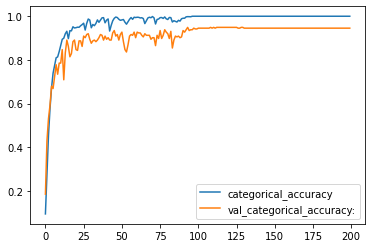

In [67]:
plt.plot(history.history['categorical_accuracy'],label='categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'],label='val_categorical_accuracy:')
plt.legend()

In [70]:
plt.plot(history.history['val_catecorY'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.legend()

KeyError: 'val_catecorY'

In [51]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(30, 225)))
model.add(Bidirectional(LSTM(128,return_sequences=True, activation='relu')))
model.add(LSTM(64,return_sequences=False, activation='relu'))
model.add(Dense(64,activation="relu"))
model.add(Dense(actions.shape[0],activation='softmax'))

sgd = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(x_train, y_train, epochs=200,batch_size = 64, callbacks=[tb_callback,checkpoint],validation_data=(x_val, y_val))

res = model.predict(x_test)
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/200
80/80 [==============================] - 7s 65ms/step - loss: 4.8267 - categorical_accuracy: 0.0161 - val_loss: 4.5791 - val_categorical_accuracy: 0.0314

Epoch 00001: val_loss improved from inf to 4.57909, saving model to 3-25\1-4.58-0.03.h5
Epoch 2/200
80/80 [==============================] - 4s 51ms/step - loss: 4.1898 - categorical_accuracy: 0.0452 - val_loss: 3.9575 - val_categorical_accuracy: 0.0581

Epoch 00002: val_loss improved from 4.57909 to 3.95748, saving model to 3-25\2-3.96-0.06.h5
Epoch 3/200
80/80 [==============================] - 4s 51ms/step - loss: 3.5207 - categorical_accuracy: 0.1119 - val_loss: 3.2608 - val_categorical_accuracy: 0.1256

Epoch 00003: val_loss improved from 3.95748 to 3.26084, saving model to 3-25\3-3.26-0.13.h5
Epoch 4/200
80/80 [==============================] - 5s 57ms/step - loss: 3.0114 - categorical_accuracy: 0.1853 - val_loss: 2.8573 - val_categorical_accuracy: 0.2323

Epoch 00004: val_loss improved from 3.26084 to 2.85733, savi

KeyboardInterrupt: 

In [102]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 1s 35ms/step - loss: 0.7728 - categorical_accuracy: 0.7896


In [61]:
new_model1 = tf.keras.models.load_model('3-26/64-0.47-0.90.h5')

In [59]:
new_model2 = tf.keras.models.load_model('3-25/41-0.58-0.88.h5')

In [62]:
loss_and_metrics = new_model1.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 0s 10ms/step - loss: 0.4336 - categorical_accuracy: 0.8948


In [63]:
loss_and_metrics

[0.43356868624687195, 0.894819438457489]

In [60]:
loss_and_metrics2 = new_model2.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 0s 9ms/step - loss: 0.6620 - categorical_accuracy: 0.8681


In [61]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 0s 9ms/step - loss: 0.7314 - categorical_accuracy: 0.8870


In [67]:
model.save('lstm.h5')

In [69]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,


# TEST realtime

In [1]:
import numpy
print(numpy.__version__)

1.19.5


In [21]:
from tensorflow import keras 
from PIL import ImageFont ,ImageDraw ,Image

In [22]:
from PIL import ImageFont ,ImageDraw ,Image

In [23]:
new_model = tf.keras.models.load_model('./완성 모델/lstm(87퍼) 완성본.h5')

In [24]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 64)            64000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 30, 256)           197632    
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                82176     
_________________________________________________________________
dense_4 (Dense)              (None, 132)               8580      
Total params: 352,388
Trainable params: 352,388
Non-trainable params: 0
_________________________________________________________________


In [34]:
np.concatenate([res[40:99], res[132:258]])



array([1.0505558e-24, 4.1496128e-16, 3.7194789e-07, 8.0426181e-23,
       5.5163623e-06, 7.4009002e-12, 1.2077557e-09, 4.3119497e-25,
       5.9140179e-21, 3.5489304e-17, 7.0537409e-11, 5.2795716e-15,
       2.3121779e-19, 1.2689877e-09, 1.2219327e-11, 1.9861697e-20,
       2.1086500e-15, 7.8004593e-25, 3.3956604e-18, 6.9311088e-15,
       1.0286342e-05, 7.6857086e-25, 2.5603012e-14, 3.7650084e-06,
       6.2033487e-06, 5.1046940e-09, 1.1863236e-06, 9.6627578e-13,
       1.1617511e-16, 2.9700375e-09, 2.2035553e-10, 9.2520280e-10,
       2.2687524e-13, 4.5883833e-10, 2.6019163e-13, 2.1845496e-16,
       8.7967225e-19, 1.1750422e-12, 1.4380382e-14, 4.0825834e-03,
       6.3336017e-11, 2.2075488e-20, 6.4371793e-16, 3.0196162e-14,
       1.0035541e-11, 1.9399370e-10, 2.4711872e-20, 1.3406894e-08,
       1.3149208e-16, 5.4545569e-07, 6.4796383e-13, 1.1021460e-08,
       1.8646060e-13, 2.0689723e-09, 5.6830061e-07, 1.5392514e-17,
       2.0841407e-21, 2.3083201e-17, 1.8705408e-09], dtype=flo

In [20]:
def extract_keypoints_pose(result):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    return np.concatenate([pose])

In [ ]:
sequence = []
sentence = []
threshold = 0.9
i = 0
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # feed 읽기
        ret, frame = cap.read()
        
        img, results = mediapipe_detection(frame, holistic)
        
        #랜드마크 그리기
        draw_landmarks(img,results)
        
        
#         keypoints = extract_keypoints_pose(result)
        
        keypoint = extract_keypoints_pose(results)
        #예측
#         print(keypoint[65])
        if keypoint[65]<0.8 or keypoint[61]<0.8:
            keypoints = extract_keypoints(results)
            keypoints = np.concatenate([keypoints[40:99], keypoints[132:258]])
            sequence.insert(0,keypoints)
            sequence = sequence[:30]
            i+=1
            if i%30 == 0:
                
                res = new_model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                if res[np.argmax(res)] > threshold:
                    print(res[np.argmax(res)])
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            
        else:
#             print(i)
            i=0
        if len(sentence) > 5:
            sentence = sentence[-5:]
        fontpath = "fonts/gulim.ttc"
        font = ImageFont.truetype(fontpath, 20)
        img_pil = Image.fromarray(img)
        draw = ImageDraw.Draw(img_pil)
        
        cv2.rectangle(img,(0,0),(640,40),(245,117,16),-1)
        #cv2.putText(img, ''.join(sentence),,
                   ##cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255,0),2,cv2.LINE_AA)
        draw.text((3,30),  ''.join(sentence), font=font, fill=(0,0,0,0))
        draw.text((450,30),  str(i), font=font, fill=(0,0,0,0))
        img = np.array(img_pil)
        #화면에 보여주기
        cv2.imshow("OpenCV Feed",img)
        i += 1
        #화면 종료
        if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [26]:
keypoints

array([ 0.91346133,  0.66073668, -0.93179095,  0.93458873,  1.15783489,
        0.71902961, -0.83590424,  0.7765975 ,  0.83704293,  0.69891989,
       -0.66573513,  0.85027885,  0.94219762,  0.79868543, -0.62242496,
        0.32080236,  0.55184233,  0.73355311, -0.66983455,  0.51193827,
        0.85941237,  0.72148299, -0.17952603,  0.17134847,  0.70796978,
        0.71221727, -0.80006409,  0.34184903,  0.83396798,  0.71231896,
       -0.15591416,  0.1725819 ,  0.72733194,  0.74299723, -0.83001339,
        0.33625749,  0.8573516 ,  0.70311379, -0.17304721,  0.19031277,
        0.75923383,  0.71035963, -0.86478221,  0.35632977,  0.8565011 ,
        0.70482767, -0.17281277,  0.19055654,  0.75154316,  0.70160615,
       -0.81299132,  0.33771321,  1.0703131 ,  1.62017167, -0.13270746,
        0.0098848 ,  0.91856015,  1.62267709,  0.13369684,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  